In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [11]:
# lets create highly imbalanced dataset
data = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'target': np.concatenate((np.zeros(950), np.ones(50)))  #
} ) 

X = data[['feature1', 'feature2']]
y = data['target']

# letrs train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# lets train a simple KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# lets see accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.95


In [12]:
# copy X_test to X_test_mod
X_test_mod = X_test.copy()
X_test_mod['Actual'] = y_test.values
X_test_mod['Predicted'] = y_pred

X_test_mod

,feature1,feature2,Actual,Predicted
508,-1.364167,0.587374,0.0,0.0
313,0.883957,-0.067805,0.0,0.0
953,-1.119755,0.649565,1.0,0.0
769,-0.459002,-0.509120,0.0,0.0
295,-0.213566,-0.350202,0.0,0.0
...,...,...,...,...
742,0.652081,-0.155232,0.0,0.0
378,0.343797,0.544967,0.0,0.0
646,-2.079337,0.777295,0.0,0.0
840,-0.226966,-1.517941,0.0,0.0


In [13]:
X_test_mod[X_test_mod['Actual'] == 1]

,feature1,feature2,Actual,Predicted
953,-1.119755,0.649565,1.0,0.0
954,-0.656702,-0.831210,1.0,0.0
968,-0.482329,0.895817,1.0,0.0
993,-1.328362,-0.453227,1.0,0.0
994,0.030559,0.203491,1.0,0.0
975,-0.110324,1.872054,1.0,0.0
957,0.769776,-0.972600,1.0,0.0
969,-0.735457,-0.186349,1.0,0.0
955,1.342109,-0.807794,1.0,0.0
998,-0.440860,1.145890,1.0,0.0


In [14]:
y_test.value_counts()

target
0.0    190
1.0     10
Name: count, dtype: int64

Confusion Matrix:


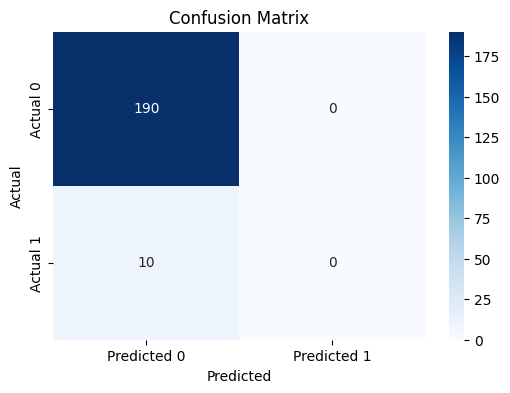

In [15]:
# Conclusion
# In imbalanced datasets, accuracy can be misleading. Here, 
# the model predicts all instances as the majority class (0), leading to high accuracy but failing to identify any minority class (1) instances.

# lets import confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show() 

In [ ]:
# similarly we can calculate precision, recall and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# very bad model for imbalanced dataset


Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Reference
- https://medium.com/@abhishekjainindore24/a-comprehensive-guide-to-performance-metrics-in-machine-learning-4ae5bd8208ce
- https://scikit-learn.org/stable/modules/model_evaluation.html